In [1]:
import pandas as pd
import re
import numpy as np
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
dffull = pd.read_csv('../../../Ironhack-Module-1-Project-Mecaho/data/processed/dffull.csv')

In [3]:
df_mean = dffull.groupby('country')['money_pp'].agg(['mean']).round(2).sort_values(by='mean', ascending = False).nlargest(10, 'mean')

In [4]:
df_sum = dffull.groupby('country')['money_pp'].agg(['sum']).round(2).sort_values(by='sum', ascending = False).nlargest(10, 'sum')

In [5]:
to_print=dffull.groupby('company')['money_pp'].agg(['sum']).round(2).sort_values(by='sum', ascending = False).nlargest(10, 'sum')

In [6]:
to_print['sum']

company
 dental implants           101463.39
 financial services         36847.96
 real estate                16120.76
 shipping                    8513.41
 retail, real estate         5167.22
 diversified                 3242.86
 real estate, education      2169.20
 investments                 2010.57
 EasyJet                     1827.04
 H&M                         1783.75
Name: sum, dtype: float64

In [39]:
with PdfPages(r'../../../Ironhack-Module-1-Project-Mecaho/data/results/Reporting_Cris.pdf') as export_pdf:
    
    plt.figure(figsize=(12,10))
    bar_mean = plt.bar(df_mean.index, df_mean['mean'], color='green')
    plt.xlabel("Country")
    plt.ylabel("USD per person")
    plt.title("Average USD you will recibe from the richest people in your country if you are from...")
    label = [i for i in df_mean['mean']]
    for i in range(len(df_mean['mean'])):
        plt.text(x = df_mean.index[i], y = df_mean['mean'][i]+1000, s = label[i], size = 10)
    export_pdf.savefig()
    plt.close()
    
    plt.figure(figsize=(12,10))
    bar_sum =plt.bar(df_sum.index, df_sum['sum'], color='orange')
    plt.xlabel("Country")
    plt.ylabel("Total USD")
    plt.title("Total USD you will recibe from the richest people in your country if you are from...")
    label = [i for i in df_sum['sum']]
    for i in range(len(df_sum['sum'])):
        plt.text(x = df_sum.index[i], y = df_sum['sum'][i]+1000, s = label[i], size = 10)
    export_pdf.savefig()
    plt.close()
    
    plt.show()


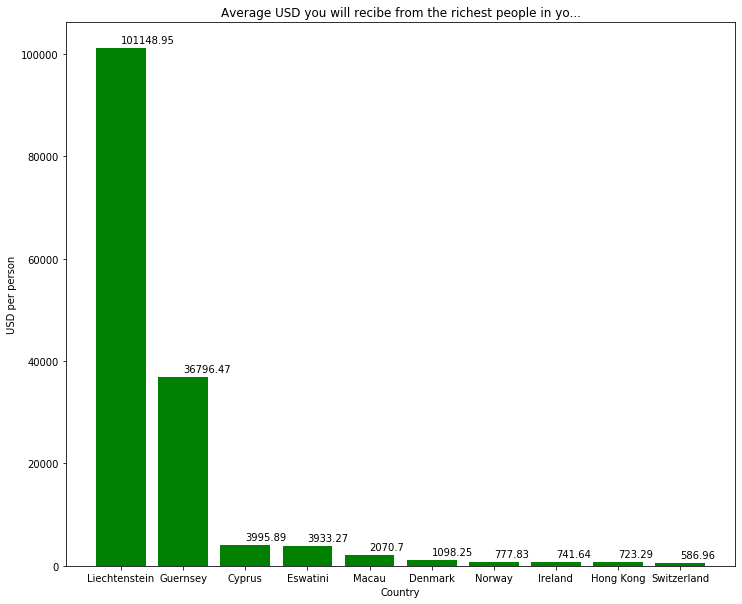